# Stock Market Analysis

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    5.) What was the correlation between different stocks' daily returns?
    6.) How much value do we put at risk by investing in a particular stock?
    7.) How can we attempt to predict future stock behavior?

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data as pdr

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [7]:
df = pdr.get_data_yahoo(tech_list,start,end)
df

Attributes   Adj Close                                           Close  \
Symbols           AAPL        GOOG        MSFT        AMZN        AAPL   
Date                                                                     
2021-07-30  145.031403  135.220993  282.602417  166.379501  145.860001   
2021-08-02  144.693344  135.989502  282.513153  166.574005  145.520004   
2021-08-03  146.522873  136.279999  284.794525  168.311996  147.360001   
2021-08-04  146.115219  136.028503  284.189423  167.735992  146.949997   
2021-08-05  146.224594  136.940002  287.175018  168.799500  147.059998   
...                ...         ...         ...         ...         ...   
2022-07-25  152.949997  108.209999  258.829987  121.139999  152.949997   
2022-07-26  151.600006  105.440002  251.899994  114.809998  151.600006   
2022-07-27  156.789993  113.599998  268.739990  120.970001  156.789993   
2022-07-28  157.350006  114.589996  276.410004  122.279999  157.350006   
2022-07-29  162.509995  116.639999  280.739990  134.949997  162.509995   

Attributes                                            High              ...  \
Symbols           GOOG        MSFT        AMZN        AAPL        GOOG  ...   
Date                                                                    ...   
2021-07-30  135.220993  284.910004  166.379501  146.330002  135.771347  ...   
2021-08-02  135.989502  284.820007  166.574005  146.949997  136.020493  ...   
2021-08-03  136.279999  287.119995  168.311996  148.039993  136.335495  ...   
2021-08-04  136.028503  286.510010  167.735992  147.789993  136.537994  ...   
2021-08-05  136.940002  289.519989  168.799500  147.839996  136.949997  ...   
...                ...         ...         ...         ...         ...  ...   
2022-07-25  108.209999  258.829987  121.139999  155.039993  110.580002  ...   
2022-07-26  105.440002  251.899994  114.809998  153.089996  107.739998  ...   
2022-07-27  113.599998  268.739990  120.970001  157.330002  114.400002  ...   
2022-07-28  114.589996  276.410004  122.279999  157.639999  114.699997  ...   
2022-07-29  116.639999  280.739990  134.949997  163.630005  116.900002  ...   

Attributes         Low                    Open                          \
Symbols           MSFT        AMZN        AAPL        GOOG        MSFT   
Date                                                                     
2021-07-30  283.910004  165.348999  144.380005  135.511002  285.170013   
2021-08-02  283.739990  165.850006  146.360001  135.484497  286.359985   
2021-08-03  284.000000  164.988495  145.809998  136.000000  285.420013   
2021-08-04  284.649994  167.278000  147.270004  136.249496  286.220001   
2021-08-05  286.100006  167.046005  146.979996  136.028503  286.880005   
...                ...         ...         ...         ...         ...   
2022-07-25  256.809998  120.029999  154.009995  108.879997  261.000000   
2022-07-26  249.570007  114.529999  152.259995  107.430000  259.859985   
2022-07-27  258.850006  117.160004  152.580002  109.599998  261.160004   
2022-07-28  267.869995  118.080002  156.979996  112.800003  269.750000   
2022-07-29  276.630005  132.410004  161.240005  113.400002  277.700012   

Attributes                   Volume                                       
Symbols           AMZN         AAPL        GOOG        MSFT         AMZN  
Date                                                                      
2021-07-30  167.397507   70440600.0  23954000.0  20944800.0  199312000.0  
2021-08-02  167.654999   62880000.0  20140000.0  16267400.0   67078000.0  
2021-08-03  167.035995   64786600.0  19064000.0  17879000.0   83146000.0  
2021-08-04  168.967499   56368300.0  16528000.0  16191300.0   43678000.0  
2021-08-05  167.811005   46397700.0  11866000.0  13900200.0   48670000.0  
...                ...          ...         ...         ...          ...  
2022-07-25  122.699997   53623900.0  28289900.0  21056000.0   50221300.0  
2022-07-26  115.790001   55138700.0  36626600.0  39348000.0   6707510

In [51]:
AAPL = pdr.get_data_yahoo('AAPL',start,end)
GOOG = pdr.get_data_yahoo('GOOG',start,end)

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,158.307183,154.538095,156.330476,156.521230,8.822239e+07,156.173864
std,12.649672,12.352874,12.577182,12.494934,2.662431e+07,12.469065
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,148.085003,145.527500,146.597496,146.897499,6.947065e+07,146.284344
50%,155.525002,152.080002,153.735001,153.860001,8.325120e+07,153.247047
75%,169.727493,165.512501,167.607498,166.727497,1.008644e+08,166.482895
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-07-30 to 2022-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

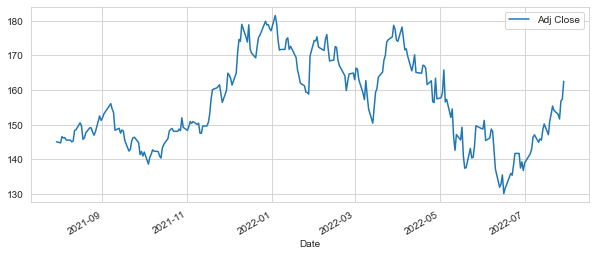

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

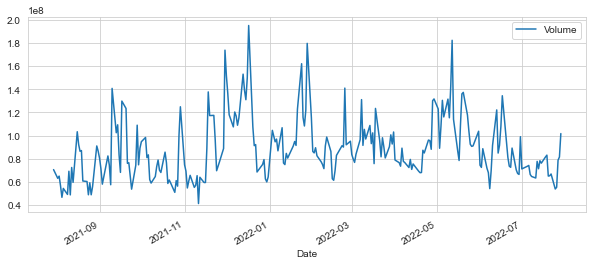

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
#Calculate moving average for AAPL
AAPL_close = pd.DataFrame(AAPL.Close)

AAPL_close['MA_10'] = AAPL_close.Close.rolling(10).mean()
AAPL_close['MA_20'] = AAPL_close.Close.rolling(20).mean()
AAPL_close['MA_50'] = AAPL_close.Close.rolling(50).mean()

AAPL_close

,Close,MA_10,MA_20,MA_50
Date,,,,
2021-07-30,145.860001,NaN,NaN,NaN
2021-08-02,145.520004,NaN,NaN,NaN
2021-08-03,147.360001,NaN,NaN,NaN
2021-08-04,146.949997,NaN,NaN,NaN
2021-08-05,147.059998,NaN,NaN,NaN
...,...,...,...,...
2022-07-25,152.949997,150.349001,146.010500,143.347801
2022-07-26,151.600006,150.923001,146.507500,143.528601
2022-07-27,156.789993,152.053000,147.474999,143.722201


<AxesSubplot:xlabel='Date'>

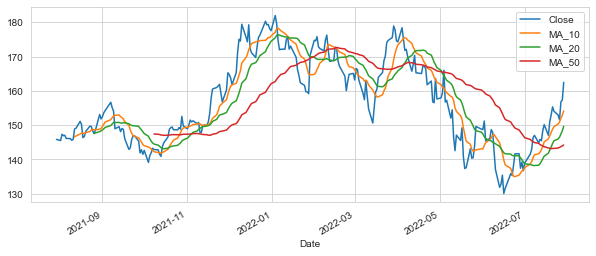

In [14]:
AAPL_close.plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

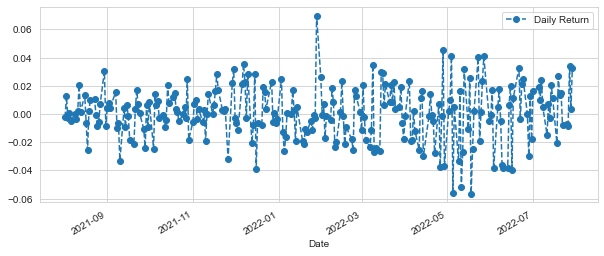

In [15]:
#Look at daily returns of AAPL stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

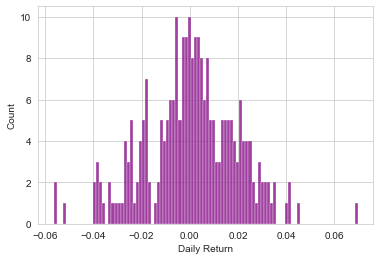

In [16]:
#Histogram of Daily Returns
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

<AxesSubplot:>

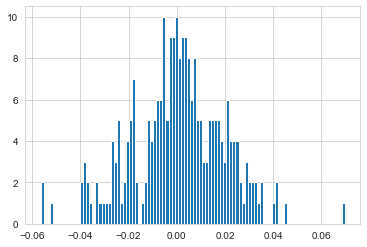

In [17]:
#Alternative approach without using seaborn
AAPL['Daily Return'].hist(bins=100)

In [18]:
#Create dataframe of just adjusted closing prices for stocks in tech_list
closing_df = df['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-30,145.031403,135.220993,282.602417,166.379501
2021-08-02,144.693344,135.989502,282.513153,166.574005
2021-08-03,146.522873,136.279999,284.794525,168.311996
2021-08-04,146.115219,136.028503,284.189423,167.735992
2021-08-05,146.224594,136.940002,287.175018,168.799500


In [19]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-30,NaN,NaN,NaN,NaN
2021-08-02,-0.002331,0.005683,-0.000316,0.001169
2021-08-03,0.012644,0.002136,0.008075,0.010434
2021-08-04,-0.002782,-0.001845,-0.002125,-0.003422
2021-08-05,0.000749,0.006701,0.010506,0.006340


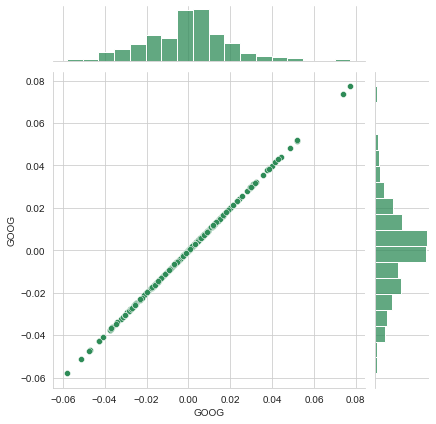

In [20]:
#Compare two stock returns with each other.
#Example below makes sense: perfect linear relationship beecause it's the same stock
sns.jointplot(x = 'GOOG',y = 'GOOG',data=tech_rets,kind = 'scatter', color = 'seagreen')

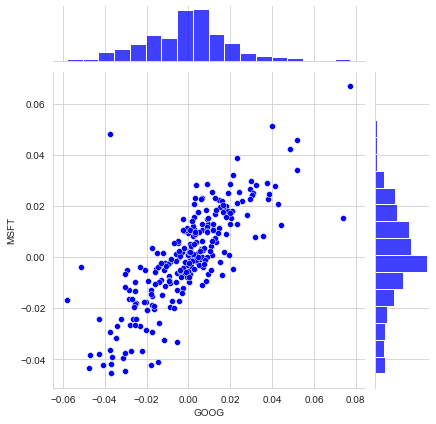

In [21]:
sns.jointplot(x = 'GOOG', y = 'MSFT', data=tech_rets,kind = 'scatter', color = 'blue')

    The pearsonr value (officially known as the Pearson product-moment correlation cofficient) 
    can give you a sense of how correlated the daily percentage returns are. 
    You can find more information about it at this link:

    url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

In [22]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-30,NaN,NaN,NaN,NaN
2021-08-02,-0.002331,0.005683,-0.000316,0.001169
2021-08-03,0.012644,0.002136,0.008075,0.010434
2021-08-04,-0.002782,-0.001845,-0.002125,-0.003422
2021-08-05,0.000749,0.006701,0.010506,0.006340


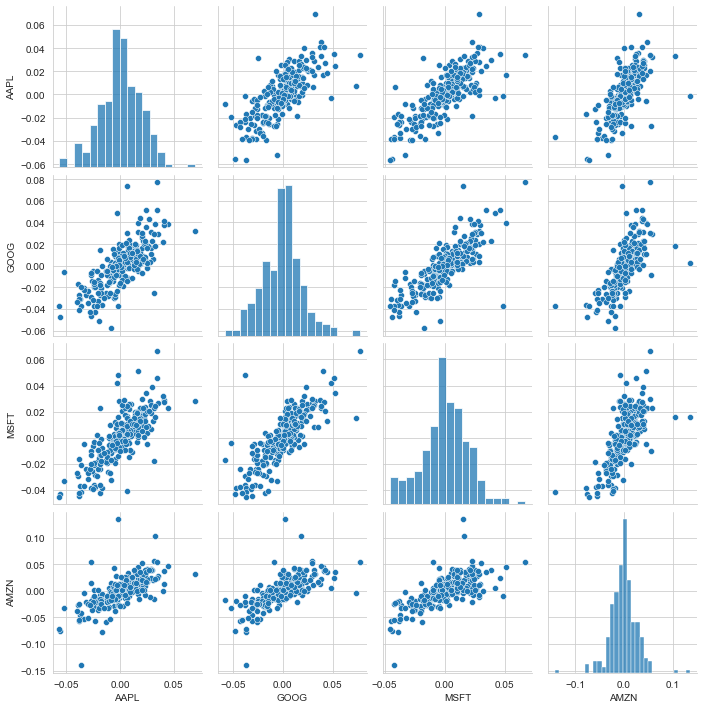

In [23]:
#Repeat comparison analysis for every stock in portfolio
sns.pairplot(tech_rets.dropna())

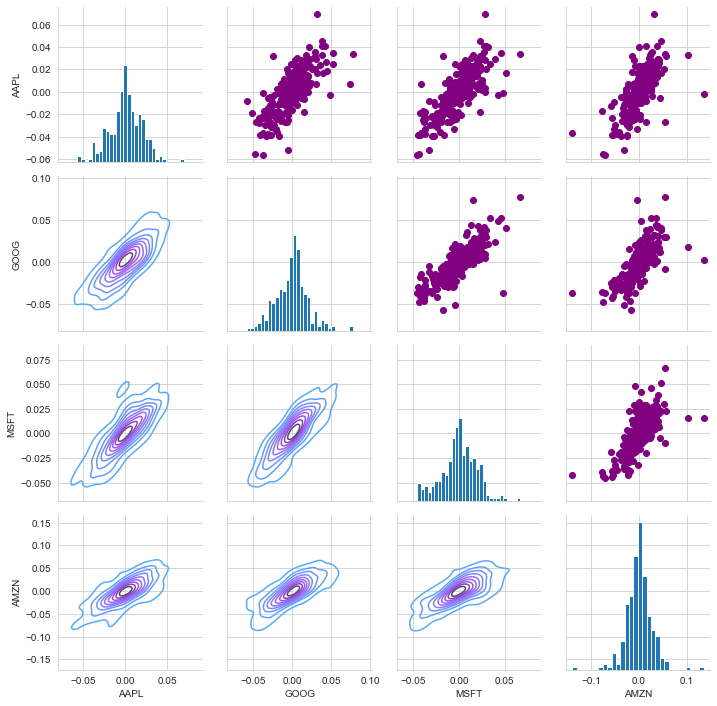

In [24]:
# Change layout of pairplot using PairGrid

returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

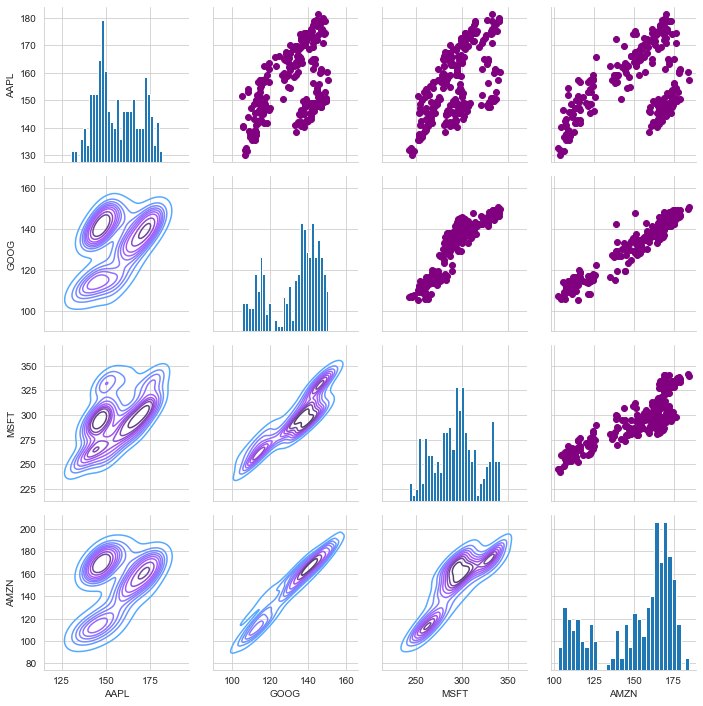

In [25]:
#Now examine correlation of closing prices instead of daily returns

returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

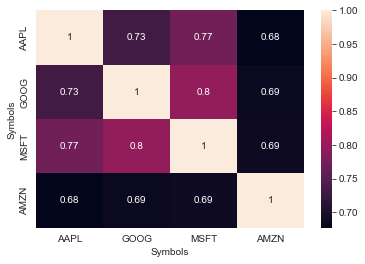

In [26]:
#Numerical correlation between prices
sns.heatmap(tech_rets.corr(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

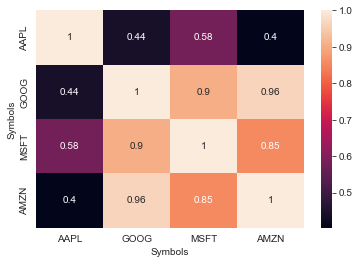

In [27]:
sns.heatmap(closing_df.corr(),annot=True)

Examine Risk vs Return of Stock

In [28]:
rets = tech_rets.dropna()

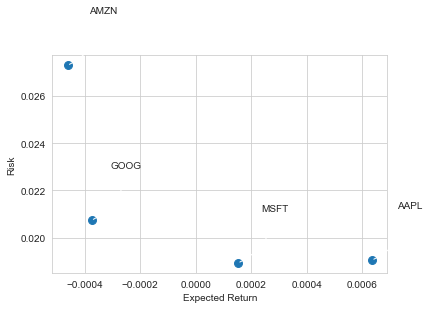

In [33]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#Label the scatter plots, use link below for reference
#http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

### Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

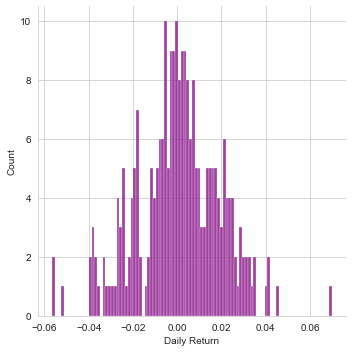

In [37]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [38]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-02,-0.002331,0.005683,-0.000316,0.001169
2021-08-03,0.012644,0.002136,0.008075,0.010434
2021-08-04,-0.002782,-0.001845,-0.002125,-0.003422
2021-08-05,0.000749,0.006701,0.010506,0.006340
2021-08-06,-0.004767,0.000701,-0.000207,-0.009197


In [39]:
rets['AAPL'].quantile(0.05)

-0.03239020855860997

The 0.05 empirical quantile of daily returns is at -0.0324. That means that with 95% confidence, our worst daily loss will not exceed 3.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0323 * 1,000,000.

### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [40]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [42]:
def stock_monte_carlo(start_price,days,mu,sigma): 
    
    #Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    #Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    #Run price array for a number of days
    for x in range(1,days):
        
        #Calculate Shock
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        #Calculate Drift
        drift[x] = mu * dt
        #Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [53]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-30,146.330002,144.110001,144.380005,145.860001,70440600.0,145.031418
2021-08-02,146.949997,145.250000,146.360001,145.520004,62880000.0,144.693344
2021-08-03,148.039993,145.179993,145.809998,147.360001,64786600.0,146.522888
2021-08-04,147.789993,146.279999,147.270004,146.949997,56368300.0,146.115219
2021-08-05,147.839996,146.169998,146.979996,147.059998,46397700.0,146.224579


Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

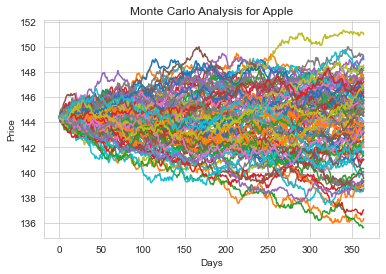

In [48]:
start_price = 144.38

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Apple')

In [49]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

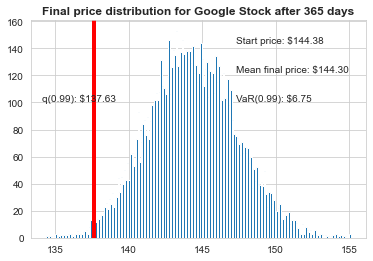

In [50]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');